In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Dosyadaki tüm sayfa isimlerini listelemek için
file_path = "vizegrades.xlsx"
with pd.ExcelFile("vizegrades.xlsx") as xls:
    sheet_names = xls.sheet_names

sheet_names


['cevap1', 'cevap2', 'cevap3', 'cevap4', 'cevap5', 'Toplam']

/var/folders/x_/bs8y0fh51s3gd_v5rgkxdzf40000gn/T/ipykernel_13340/2058949895.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


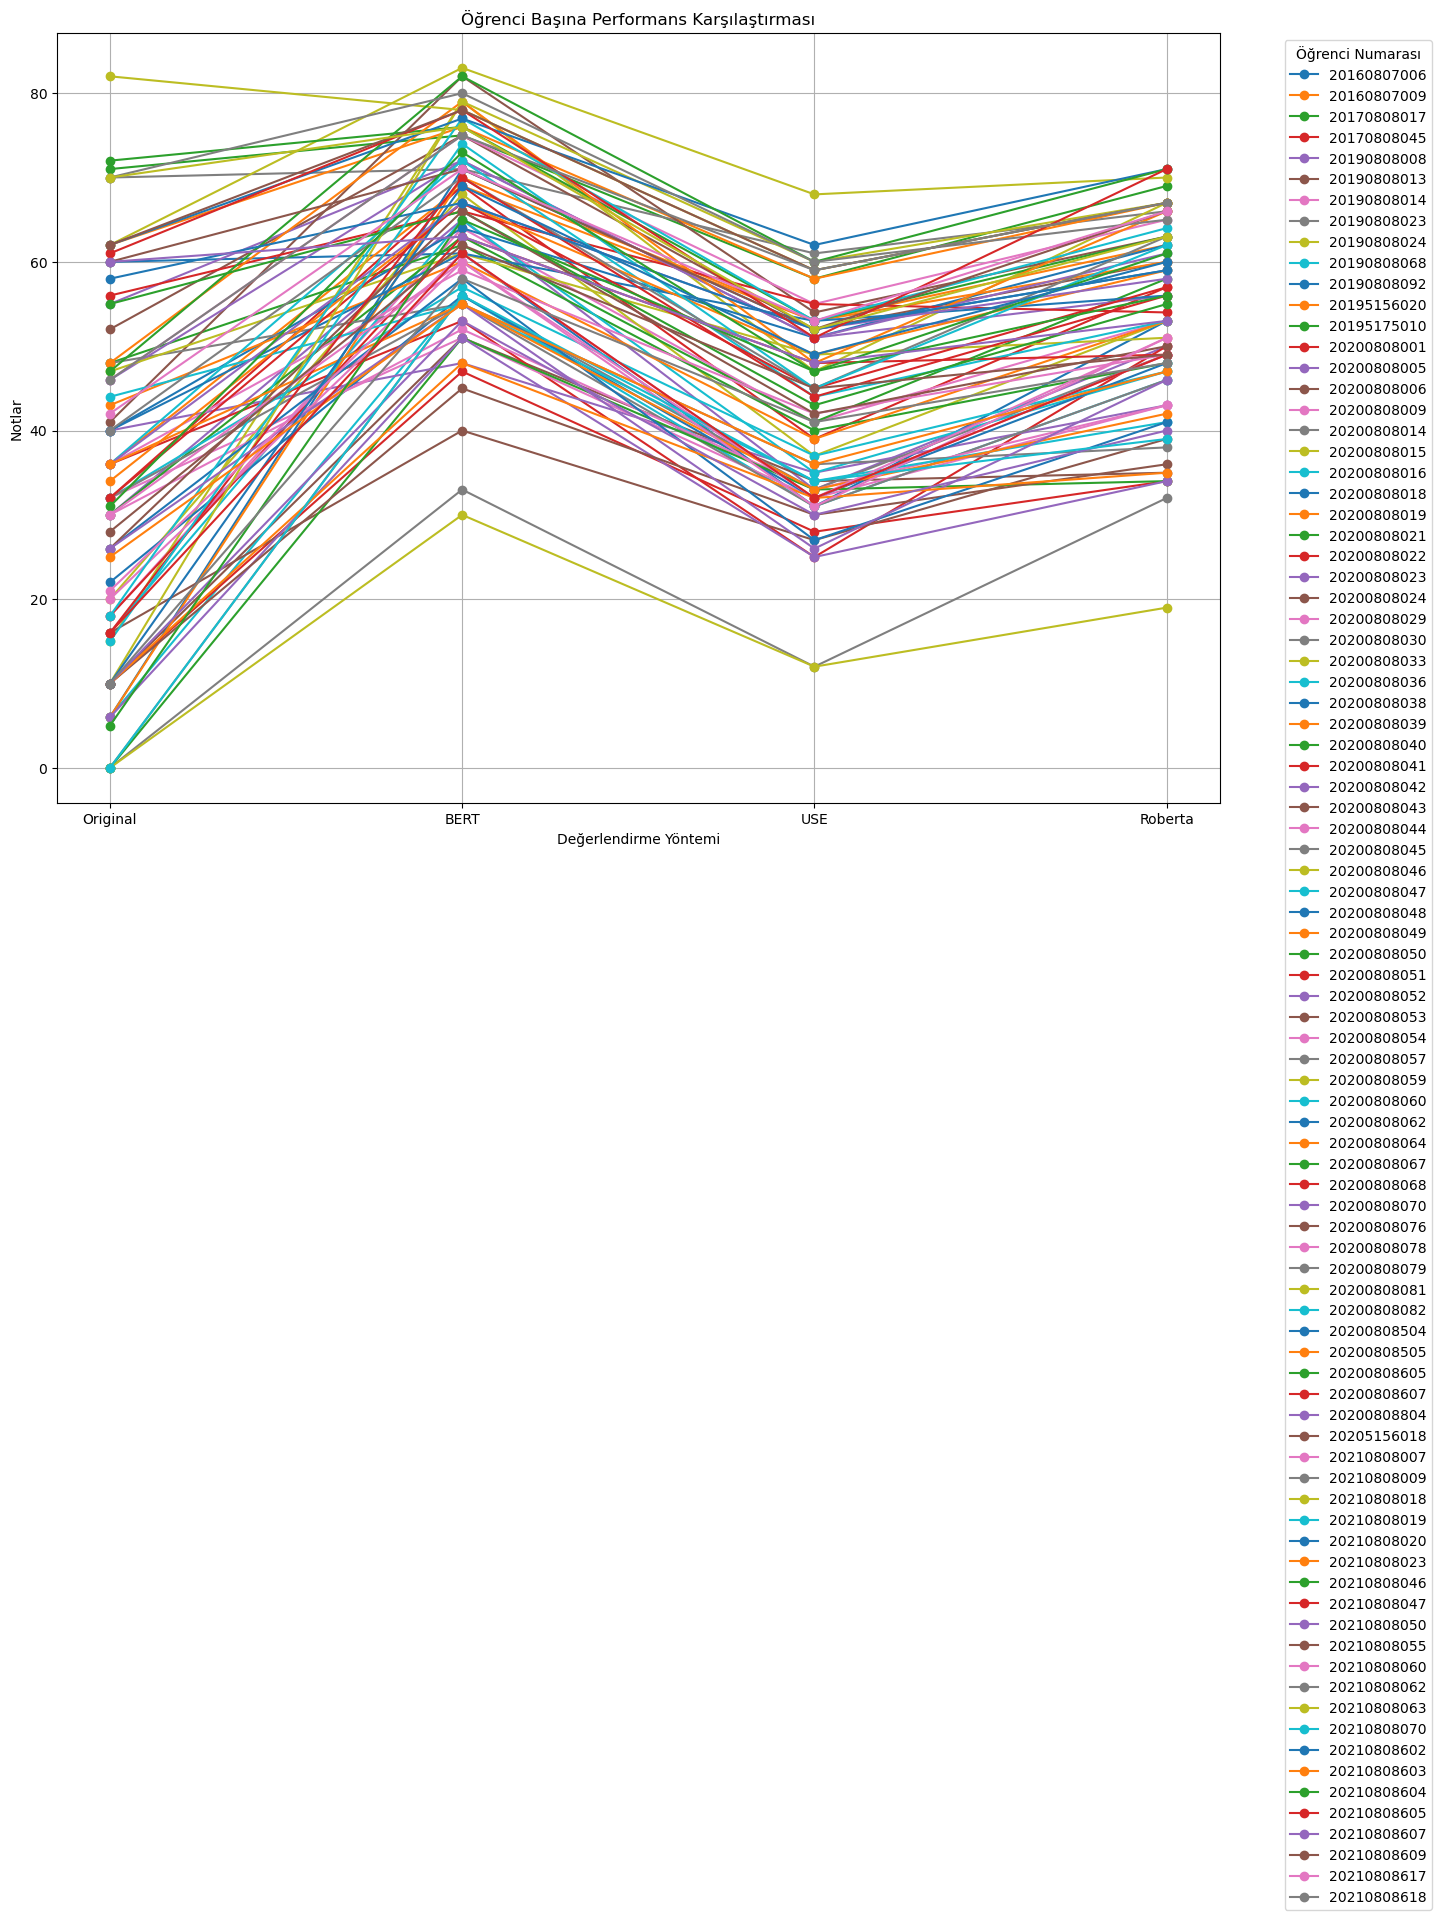

In [5]:
import matplotlib.pyplot as plt

# Her öğrenci için bir çizgi grafiği oluşturmak
plt.figure(figsize=(15, 10))

df_toplam = pd.read_excel(file_path, sheet_name='Toplam')

# İlk birkaç satırı gözlemleyelim.
df_toplam.head()
# Her öğrenci için notların çizilmesi
for index, row in df_toplam.iterrows():
    plt.plot(['Original', 'BERT', 'USE', 'Roberta'], row[1:], marker='o', label=row['StudentNo'])

plt.title('Öğrenci Başına Performans Karşılaştırması')
plt.xlabel('Değerlendirme Yöntemi')
plt.ylabel('Notlar')
plt.legend(title='Öğrenci Numarası', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Her öğrenci için en yüksek ve en düşük notlar arasındaki farkı hesaplama
df_toplam['Max Fark'] = df_toplam[['Original', 'BERT', 'USE', 'Roberta']].apply(lambda x: x.max() - x.min(), axis=1)

# Belirlenen eşik değeri (örneğin 20)
esik_deger = 20

# Eşik değerinin üzerindeki farkları gösteren öğrencilerin listesi
onemli_fark_gosterenler = df_toplam[df_toplam['Max Fark'] > esik_deger]

onemli_fark_gosterenler[['StudentNo', 'Original', 'BERT', 'USE', 'Roberta', 'Max Fark']]


,StudentNo,Original,BERT,USE,Roberta,Max Fark
0,20160807006,60,61,31,53,30
1,20160807009,36,69,53,62,33
3,20170808045,32,69,39,57,37
4,20190808008,30,65,33,50,35
5,20190808013,10,51,34,35,41
...,...,...,...,...,...,...
82,20210808604,5,65,47,56,60
83,20210808605,16,61,32,49,45
85,20210808609,28,62,45,49,34
86,20210808617,42,71,53,66,29


In [7]:
# Her bir model için standart sapma hesaplama
std_devs = df_toplam[['Original', 'BERT', 'USE', 'Roberta']].std()
std_devs.sort_values(inplace=True)

std_devs


Roberta     10.981104
BERT        10.990901
USE         11.609093
Original    20.680621
dtype: float64

In [8]:
# Notları belirtilen kriterlere göre işaretleme fonksiyonu
def notu_isaretle(not_degeri):
    if not_degeri < 33:
        return "Failed"
    elif not_degeri <= 66:
        return "Successful"
    else:
        return "High Success"

# Her bir not sütunu için işaretlemeyi uygulama
isaretlenmis_notlar = df_toplam[['Original', 'BERT', 'USE', 'Roberta']].applymap(notu_isaretle)
isaretlenmis_notlar['StudentNo'] = df_toplam['StudentNo']  # Öğrenci numaralarını ekleyelim
isaretlenmis_notlar = isaretlenmis_notlar[['StudentNo', 'Original', 'BERT', 'USE', 'Roberta']]  # Sütun sırasını düzenleyelim

isaretlenmis_notlar.head()  # İlk birkaç satırı gösterelim


,StudentNo,Original,BERT,USE,Roberta
0,20160807006,Successful,Successful,Failed,Successful
1,20160807009,Successful,High Success,Successful,Successful
2,20170808017,High Success,High Success,Successful,High Success
3,20170808045,Failed,High Success,Successful,Successful
4,20190808008,Failed,Successful,Successful,Successful


In [9]:
# Her değerlendirme yöntemi için Original'de Failed iken Successful olan öğrenci sayısını hesaplama
successful_counts = {}

for method in ['BERT', 'USE', 'Roberta']:
    successful_counts[method] = isaretlenmis_notlar[
        (isaretlenmis_notlar['Original'] == 'Failed') & 
        (isaretlenmis_notlar[method] == 'Successful')
    ].shape[0]

successful_counts


{'BERT': 33, 'USE': 29, 'Roberta': 42}

In [10]:
# Her değerlendirme yöntemi için Original'de Failed iken High Success olan öğrenci sayısını hesaplama
high_success_counts = {}

for method in ['BERT', 'USE', 'Roberta']:
    high_success_counts[method] = isaretlenmis_notlar[
        (isaretlenmis_notlar['Original'] == 'Failed') & 
        (isaretlenmis_notlar[method] == 'High Success')
    ].shape[0]

high_success_counts


{'BERT': 12, 'USE': 0, 'Roberta': 2}

In [11]:
# USE için 'Failed' iken 'Successful' olan öğrencilerin listesi ve notları
use_failed_to_successful = isaretlenmis_notlar[
    (isaretlenmis_notlar['Original'] == 'Failed') & 
    (isaretlenmis_notlar['USE'] == 'Successful')
][['StudentNo', 'Original', 'USE']]

use_failed_to_successful


,StudentNo,Original,USE
3,20170808045,Failed,Successful
4,20190808008,Failed,Successful
5,20190808013,Failed,Successful
6,20190808014,Failed,Successful
8,20190808024,Failed,Successful
10,20190808092,Failed,Successful
17,20200808014,Failed,Successful
18,20200808015,Failed,Successful
19,20200808016,Failed,Successful
21,20200808019,Failed,Successful


In [12]:
# Original ve USE değerlendirmesindeki notları ile birlikte öğrencilerin listesi
original_use_notlar = df_toplam[
    df_toplam['StudentNo'].isin(use_failed_to_successful['StudentNo'])
][['StudentNo', 'Original', 'USE']]

original_use_notlar


,StudentNo,Original,USE
3,20170808045,32,39
4,20190808008,30,33
5,20190808013,10,34
6,20190808014,18,41
8,20190808024,20,37
10,20190808092,6,52
17,20200808014,0,33
18,20200808015,15,47
19,20200808016,16,35
21,20200808019,6,53


In [13]:
# Notları güncellenen kriterlere göre yeniden işaretleme fonksiyonu
def notu_isaretle_guncel(not_degeri):
    if not_degeri < 40:
        return "Failed"
    elif not_degeri <= 70:
        return "Successful"
    else:
        return "High Success"

# Her bir not sütunu için güncellenmiş işaretlemeyi uygulama
guncel_isaretlenmis_notlar = df_toplam[['Original', 'BERT', 'USE', 'Roberta']].applymap(notu_isaretle_guncel)
guncel_isaretlenmis_notlar['StudentNo'] = df_toplam['StudentNo']  # Öğrenci numaralarını ekleyelim
guncel_isaretlenmis_notlar = guncel_isaretlenmis_notlar[['StudentNo', 'Original', 'BERT', 'USE', 'Roberta']]  # Sütun sırasını düzenleyelim

guncel_isaretlenmis_notlar.head()  # İlk birkaç satırı gösterelim


,StudentNo,Original,BERT,USE,Roberta
0,20160807006,Successful,Successful,Failed,Successful
1,20160807009,Failed,Successful,Successful,Successful
2,20170808017,High Success,High Success,Successful,Successful
3,20170808045,Failed,Successful,Failed,Successful
4,20190808008,Failed,Successful,Failed,Successful


In [14]:
# Güncellenmiş kriterlere göre her değerlendirme yöntemi için analizi tekrarlama
guncel_failed_to_successful_counts = {}
guncel_successful_to_failed_counts = {}
guncel_failed_to_high_success_counts = {}

for method in ['BERT', 'USE', 'Roberta']:
    guncel_failed_to_successful_counts[method] = guncel_isaretlenmis_notlar[
        (guncel_isaretlenmis_notlar['Original'] == 'Failed') & 
        (guncel_isaretlenmis_notlar[method] == 'Successful')
    ].shape[0]

    guncel_successful_to_failed_counts[method] = guncel_isaretlenmis_notlar[
        (guncel_isaretlenmis_notlar['Original'] == 'Successful') & 
        (guncel_isaretlenmis_notlar[method] == 'Failed')
    ].shape[0]

    guncel_failed_to_high_success_counts[method] = guncel_isaretlenmis_notlar[
        (guncel_isaretlenmis_notlar['Original'] == 'Failed') & 
        (guncel_isaretlenmis_notlar[method] == 'High Success')
    ].shape[0]

guncel_failed_to_successful_counts, guncel_successful_to_failed_counts, guncel_failed_to_high_success_counts


({'BERT': 44, 'USE': 22, 'Roberta': 42},
 {'BERT': 0, 'USE': 5, 'Roberta': 0},
 {'BERT': 7, 'USE': 0, 'Roberta': 0})

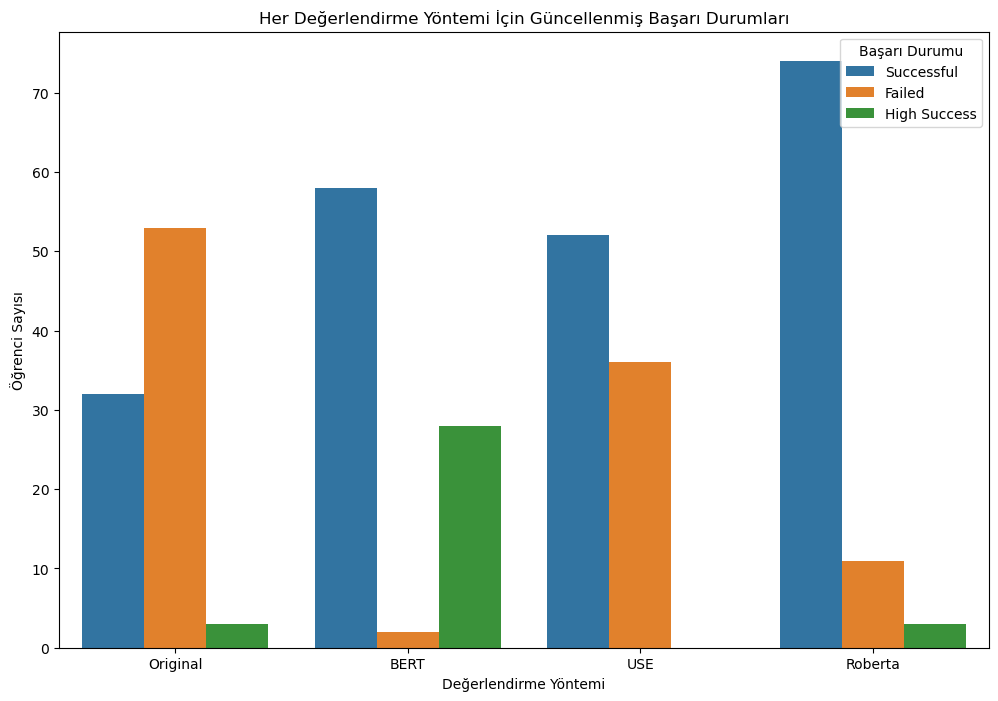

In [15]:
import seaborn as sns

# Güncellenmiş başarı durumlarını içeren DataFrame'i hazırlama
guncel_basari_durumlari = guncel_isaretlenmis_notlar.melt(id_vars='StudentNo', var_name='Method', value_name='Success Status')

# Grafiği çizme
plt.figure(figsize=(12, 8))
sns.countplot(x='Method', hue='Success Status', data=guncel_basari_durumlari)
plt.title('Her Değerlendirme Yöntemi İçin Güncellenmiş Başarı Durumları')
plt.xlabel('Değerlendirme Yöntemi')
plt.ylabel('Öğrenci Sayısı')
plt.legend(title='Başarı Durumu', loc='upper right')
plt.show()


In [16]:
# Öğrencileri Original notlarına göre gruplandırma
# Örneğin, 0-40 arası, 41-70 arası ve 71-100 arası olacak şekilde gruplandırabiliriz.
bins = [0, 40, 70, 100]
labels = ['0-40', '41-70', '71-100']
df_toplam['Original Group'] = pd.cut(df_toplam['Original'], bins=bins, labels=labels, right=False)

# Gruplara göre diğer yöntemlerdeki başarı durumlarını kıyaslayan bir DataFrame oluşturma
group_comparison = df_toplam.groupby('Original Group').apply(
    lambda x: x[['BERT', 'USE', 'Roberta']].applymap(notu_isaretle_guncel).apply(pd.Series.value_counts).fillna(0)
)

group_comparison


BERT   USE  Roberta
Original Group                                  
0-40           Failed         2.0  31.0     11.0
               High Success   7.0   0.0      0.0
               Successful    44.0  22.0     42.0
41-70          Failed         0.0   5.0      0.0
               High Success  15.0   0.0      3.0
               Successful    14.0  24.0     26.0
71-100         High Success   6.0   0.0      0.0
               Successful     0.0   6.0      6.0

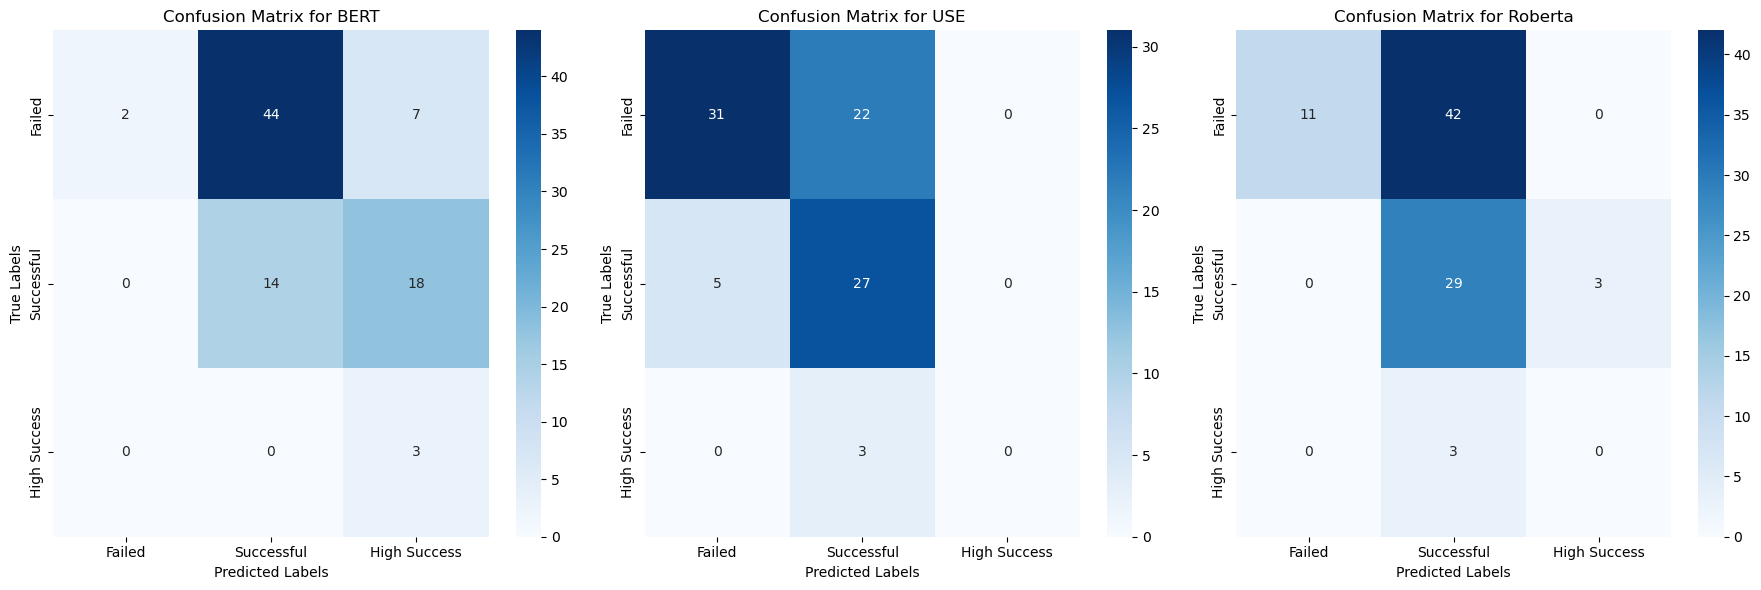

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix hesaplamak için, başarı durumlarını sayısal değerlere dönüştürme
# Failed: 0, Successful: 1, High Success: 2
success_mapping = {"Failed": 0, "Successful": 1, "High Success": 2}

# Original notları ve diğer modeller için başarı durumlarını sayısal değerlere dönüştürme
df_numeric = guncel_isaretlenmis_notlar.replace(success_mapping)

# Her model için confusion matrix hesaplama
confusion_matrices = {}
for method in ['BERT', 'USE', 'Roberta']:
    cm = confusion_matrix(df_numeric['Original'], df_numeric[method], labels=[0, 1, 2])
    confusion_matrices[method] = cm

confusion_matrices

# Confusion matrix'leri grafik olarak çizme
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()
methods = ['BERT', 'USE', 'Roberta']

for i, method in enumerate(methods):
    sns.heatmap(confusion_matrices[method], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix for {method}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    axes[i].set_xticklabels(['Failed', 'Successful', 'High Success'])
    axes[i].set_yticklabels(['Failed', 'Successful', 'High Success'])

plt.tight_layout()
plt.show()
